# Preliminary Analysis

Initial analysis of offline evaluation experimentation on baseline recommender systems.

### Setup

Import libraries.

In [1]:
import matplotlib.pyplot as plt
import pickle as pkl
import seaborn as sns
import pandas as pd

### Load evaluation results

Experiment components:

1. True preference data generator (nuser 943, nitem 1682, density 0.5):
    - Indian Buffet Process
    - Uniform generator
    
2. Observation sampler:
    - Popular sampler
    - Uniform sampler
    
3. Evaluation Protocal:
    - Partition by user on user-item dense matrix, sample 0.2 items for test per user.
    
4. Recommenders
    - Popular
    - Random
    - Oracle

Evaluation results come from the combination of all the components.

In [2]:
with open('build/simulate_ibp_unif_csr-ml_1m-icorr.pkl', 'rb') as f:
    ibp_unif = pkl.load(f)

In [3]:
with open('build/simulate_ibp_pop_csr-ml_1m-all.pkl', 'rb') as f:
    ibp_pop = pkl.load(f)

In [4]:
with open('build/simulate_lda_unif_csr-ml_1m-icorr.pkl', 'rb') as f:
    lda_unif = pkl.load(f)

In [5]:
with open('build/simulate_lda_pop_csr-ml_1m-icorr.pkl', 'rb') as f:
    lda_pop = pkl.load(f)

### Plot the results

In [6]:
def extract_result(sims_results, metric='precision'):
    obs_label = ''.join([metric, '_obs'])
    pref_label = ''.join([metric, '_pref'])
    result = sims_results[['algorithm', obs_label, pref_label]]
    result = result.rename(columns={obs_label: 'observation', pref_label: 'preference'})
    result['error'] = result['observation'] - result['preference']
    return result

In [7]:
def plot_vertical_mean(a, **kwargs):
    x = a.mean()
    plt.axvline(x)
    bottom, top = plt.ylim()
    xid = round(x+0.0002, 4)
    yid = round(top*0.8)
    text = "mean={:.2f}".format(x)
    plt.text(xid, yid, text, rotation=90)

In [8]:
def plot_metric(sims_results, metric='precision', style='seaborn-talk'):
    with plt.style.context(style):
        res = extract_result(sims_results, metric)
        res_tall = res.melt(id_vars='algorithm', var_name='type', value_name='metric')
        g = sns.FacetGrid(res_tall, col='algorithm', row='type', 
                          sharey=False, sharex=False, height=5,
                          margin_titles=True)
        g = g.map(sns.distplot, 'metric')
        g = (g.map(plot_vertical_mean, 'metric')
             .set_titles(col_template='{col_name}')
             .set_axis_labels(metric, 'count'))
    plt.show()

### IBP - Uniform

This model configuration emphasizes popularity effect. 

**Precision**

/home/MucunTian/anaconda3/envs/eval-err/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/MucunTian/anaconda3/envs/eval-err/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


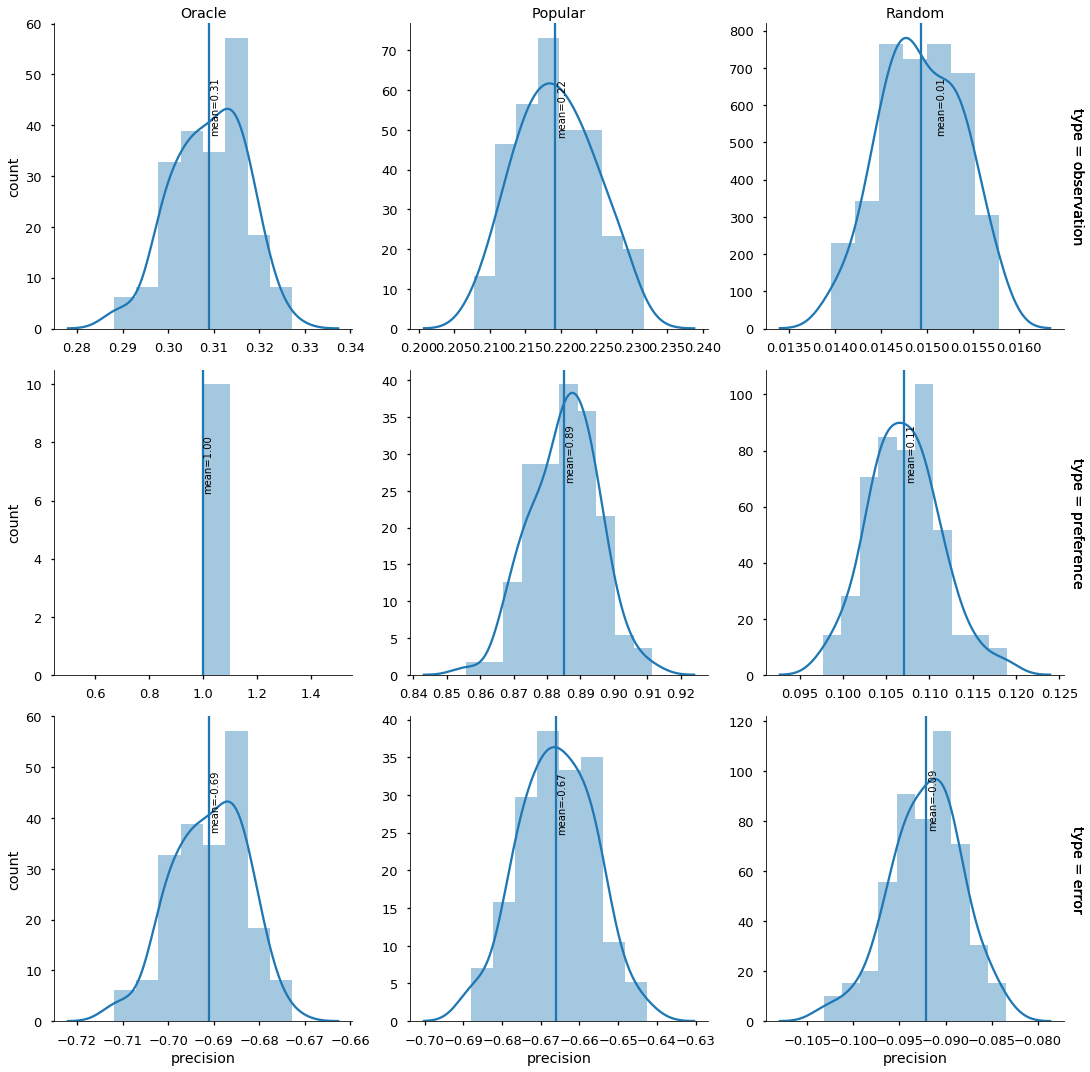

In [9]:
plot_metric(ibp_unif, 'precision')

- Precision performs better on true preferences than on observations. This may be because our experiment assumes that relevant items are missing, and precision doesn't change the length of recommendation lists. This cause the number of relevant items using true preferences are always greater than or equal to the one using observations.

- This doesn't change the ranking order of recommendation algorithms. Popular recommender is close to the Oracle recommender and much better than random recommender.

**Recall**

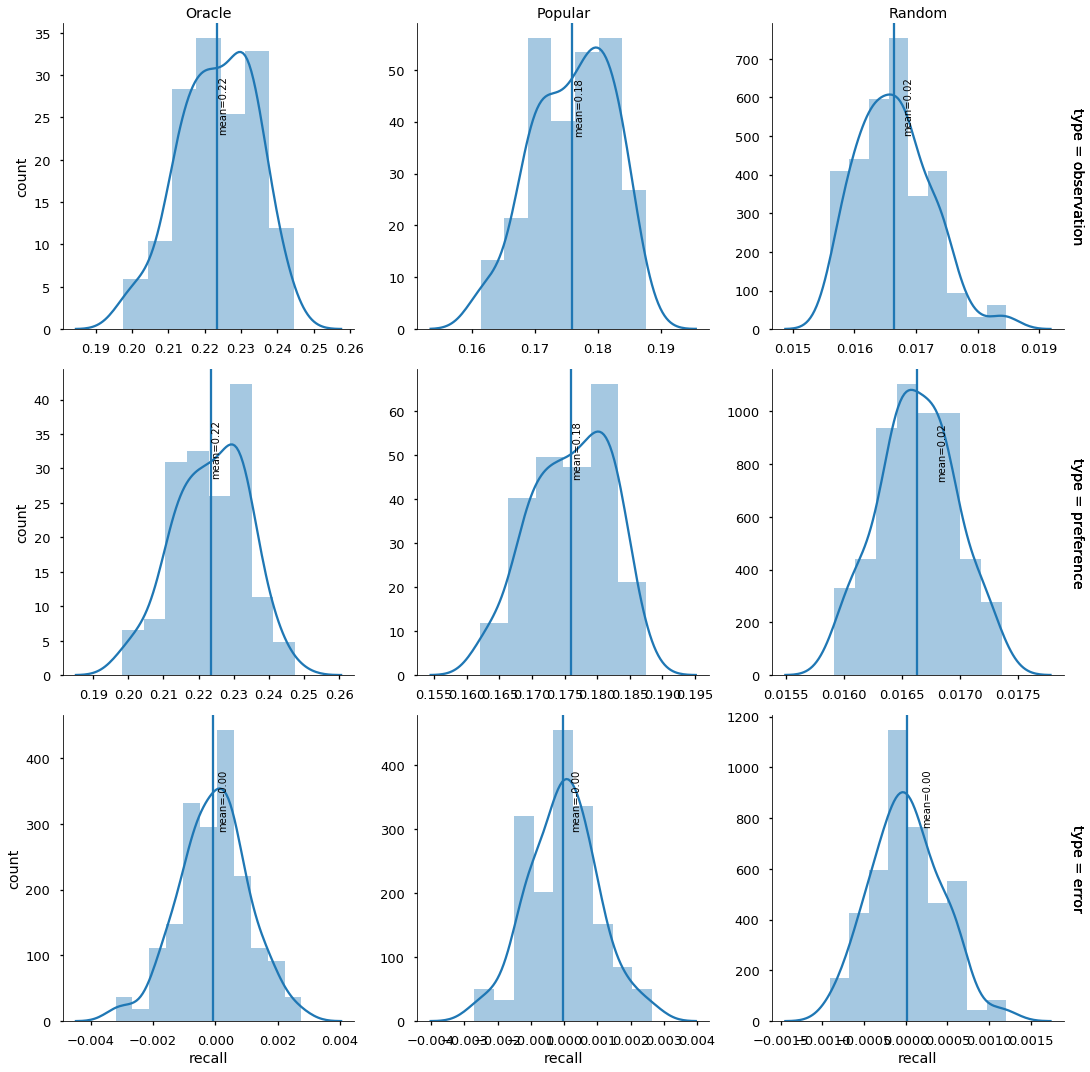

In [10]:
plot_metric(ibp_unif, 'recall')

- Recall well satisfied Steck's paper conlusion!

- Popular recommender reaches the Oracle recommender performance!

**Reciprocal Rank**

/home/MucunTian/anaconda3/envs/eval-err/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/MucunTian/anaconda3/envs/eval-err/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


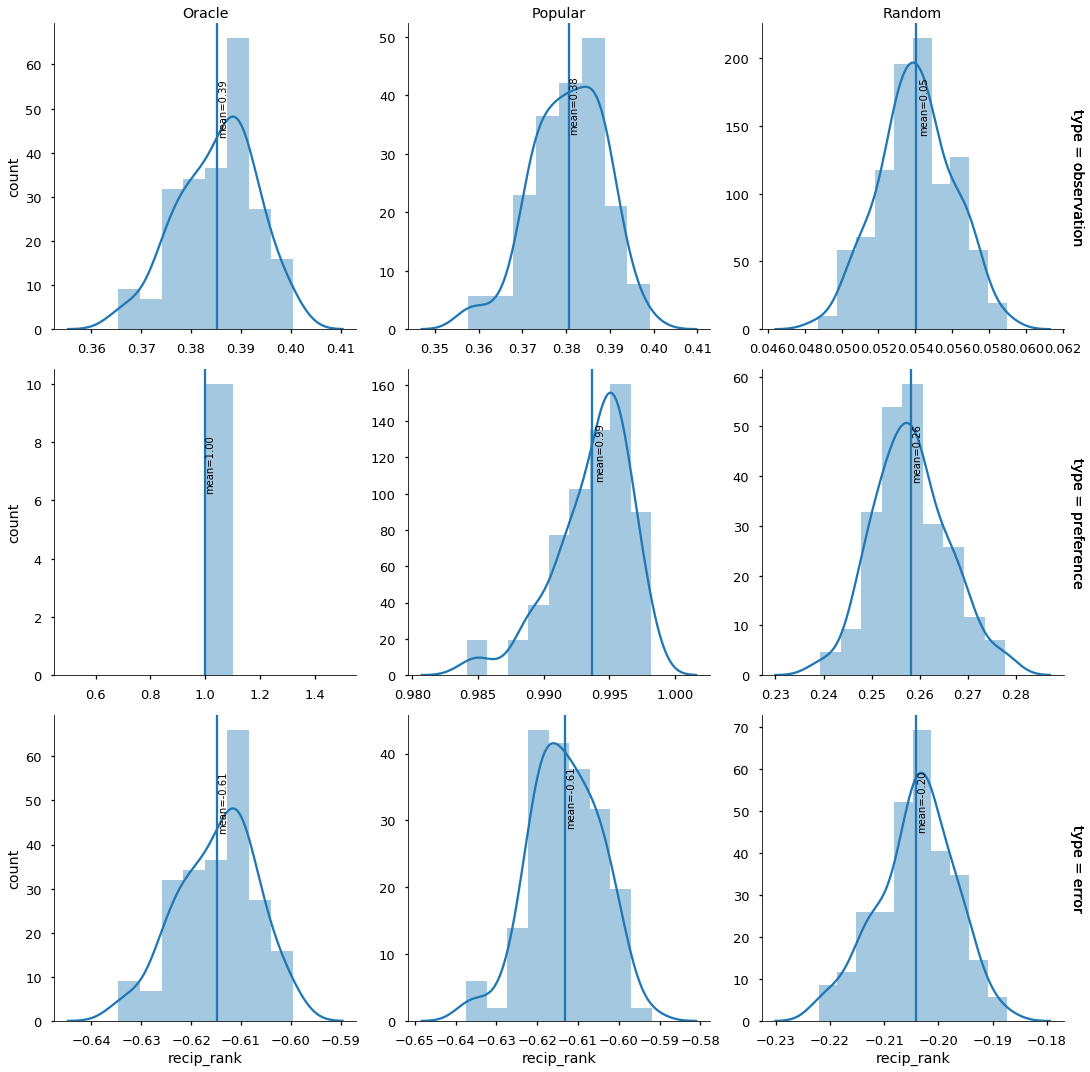

In [11]:
plot_metric(ibp_unif, 'recip_rank')

- Simular results to previous ones
- Biased metric

**nDCG**

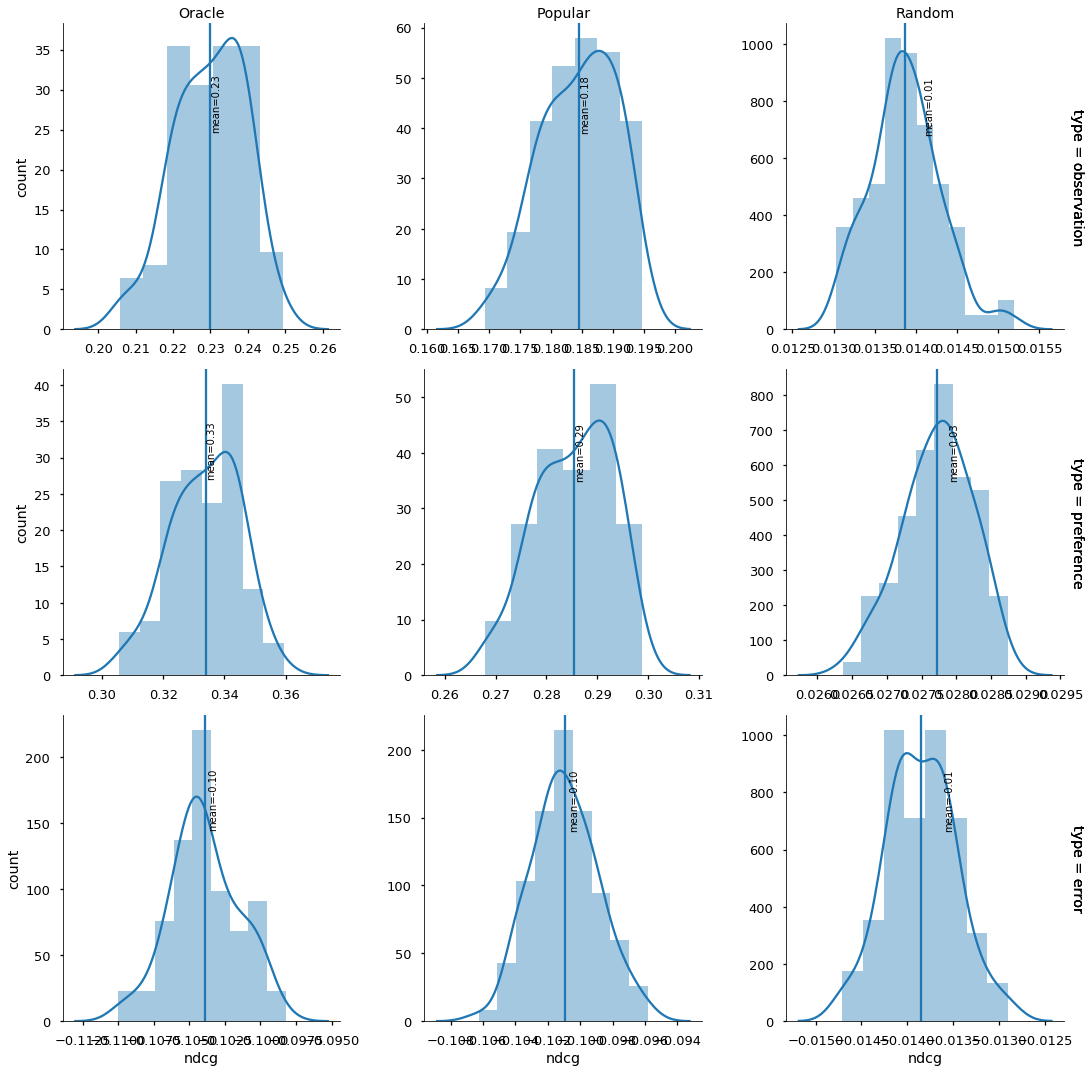

In [12]:
plot_metric(ibp_unif, 'ndcg')

- Similar results.
- Baised metric.

### IBP - Popularity

This model emphasizes popularity even more than first one.

**Precision**

/home/MucunTian/anaconda3/envs/eval-err/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/MucunTian/anaconda3/envs/eval-err/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


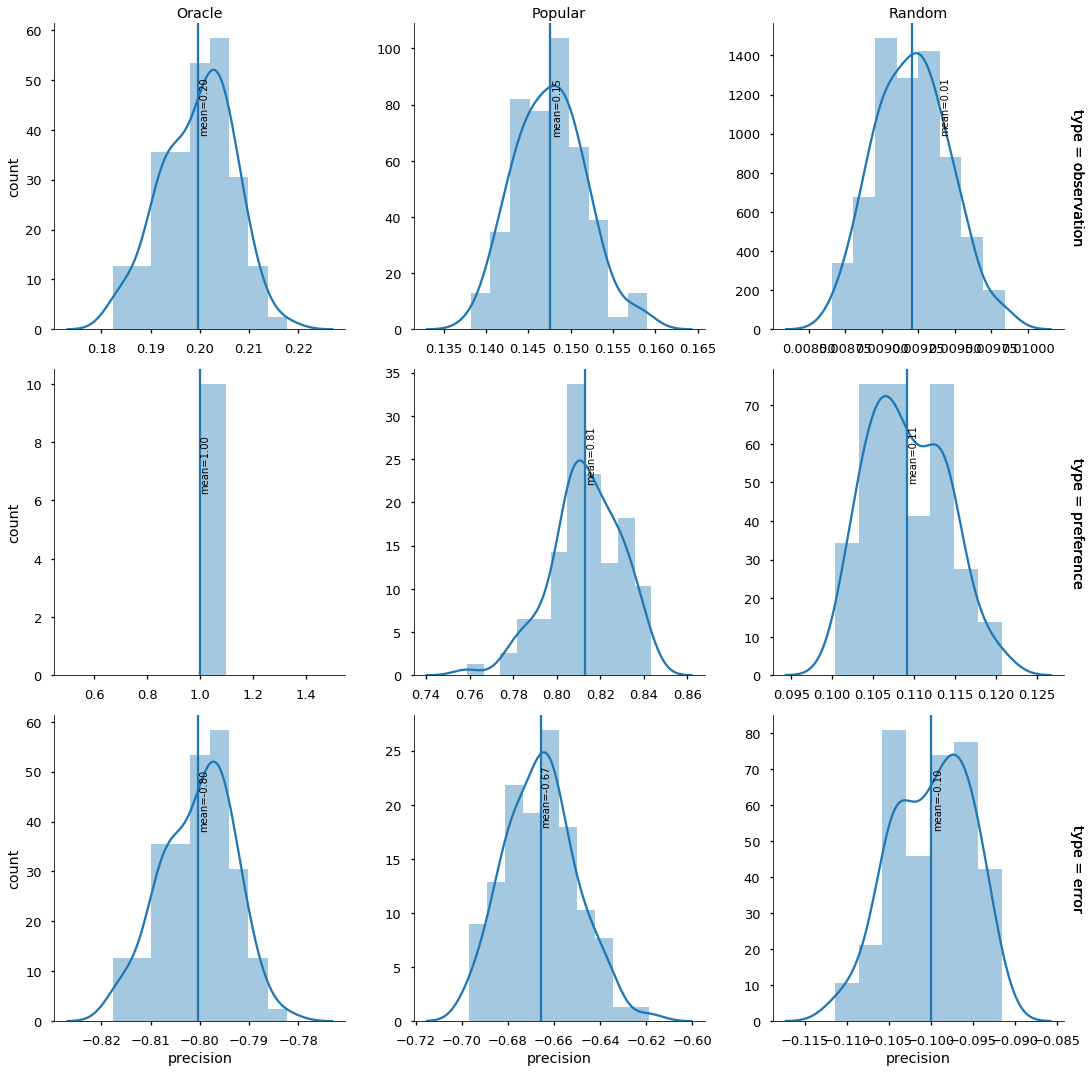

In [13]:
plot_metric(ibp_pop, 'precision')

**Recall**

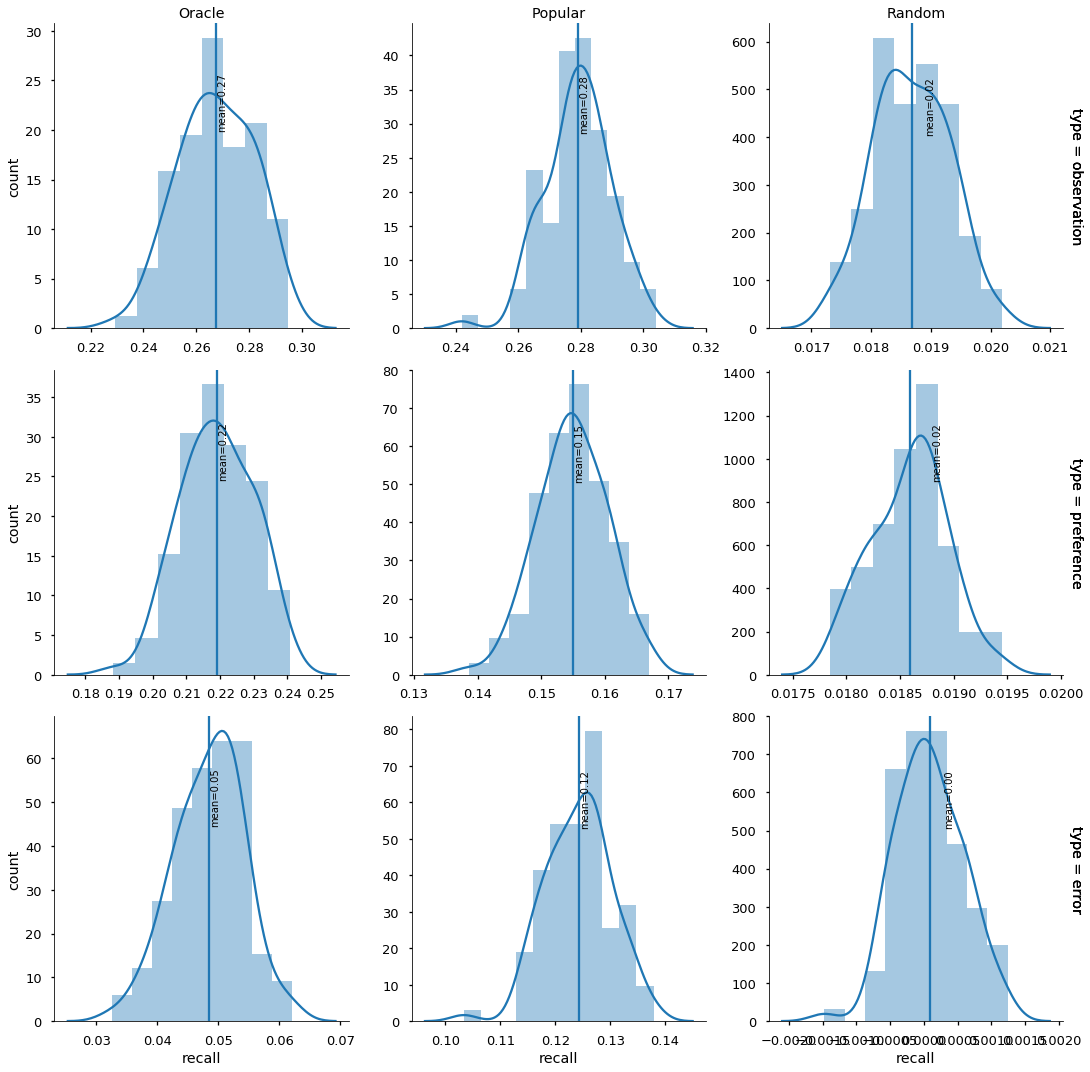

In [14]:
plot_metric(ibp_pop, 'recall')

- Popular recommender outperforms the Oracle on observations but is comparable to the Oracle on true preferences.

**Reciprocal Rank**

/home/MucunTian/anaconda3/envs/eval-err/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/MucunTian/anaconda3/envs/eval-err/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


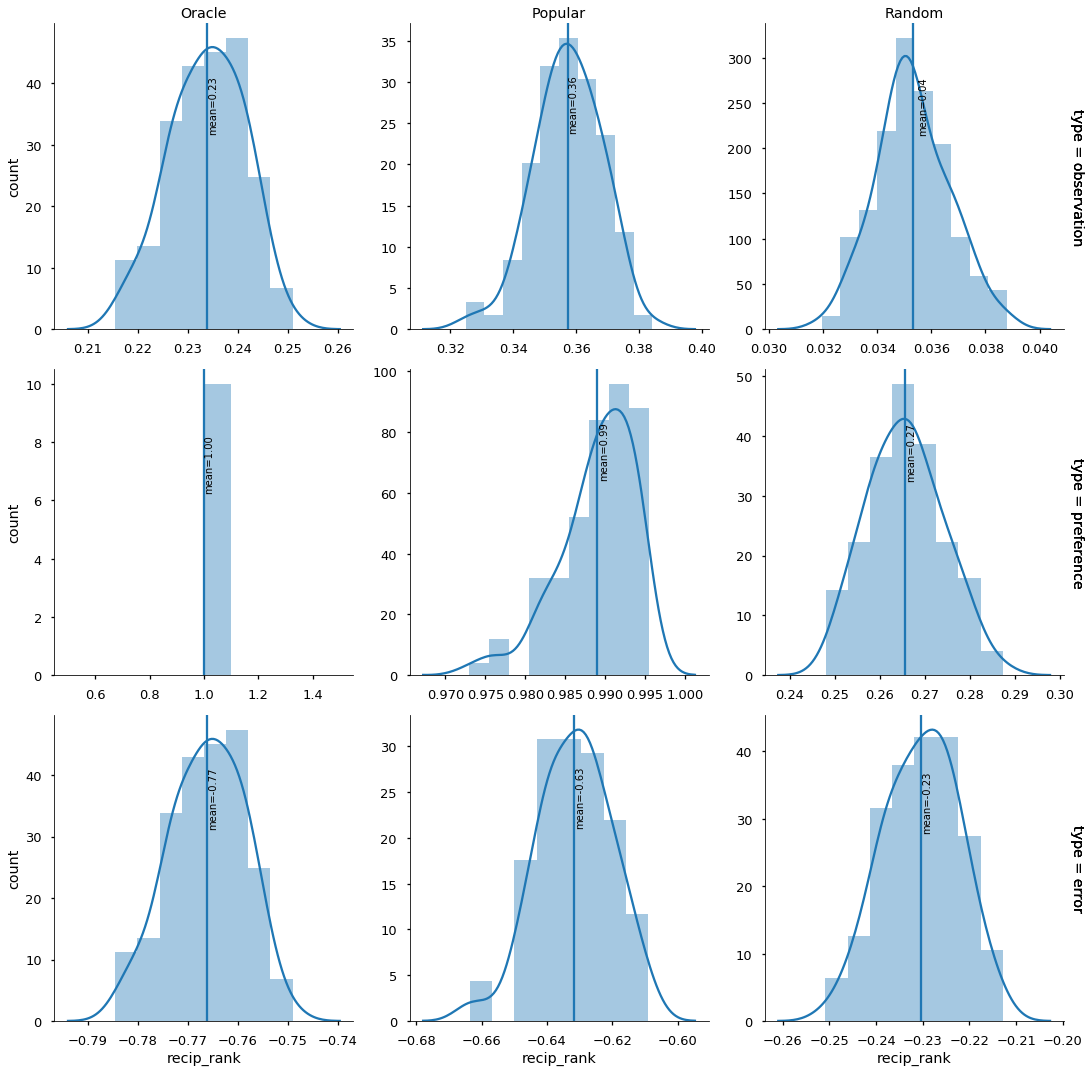

In [15]:
plot_metric(ibp_pop, 'recip_rank')

- Popular works the best on both observations.

**nDCG**

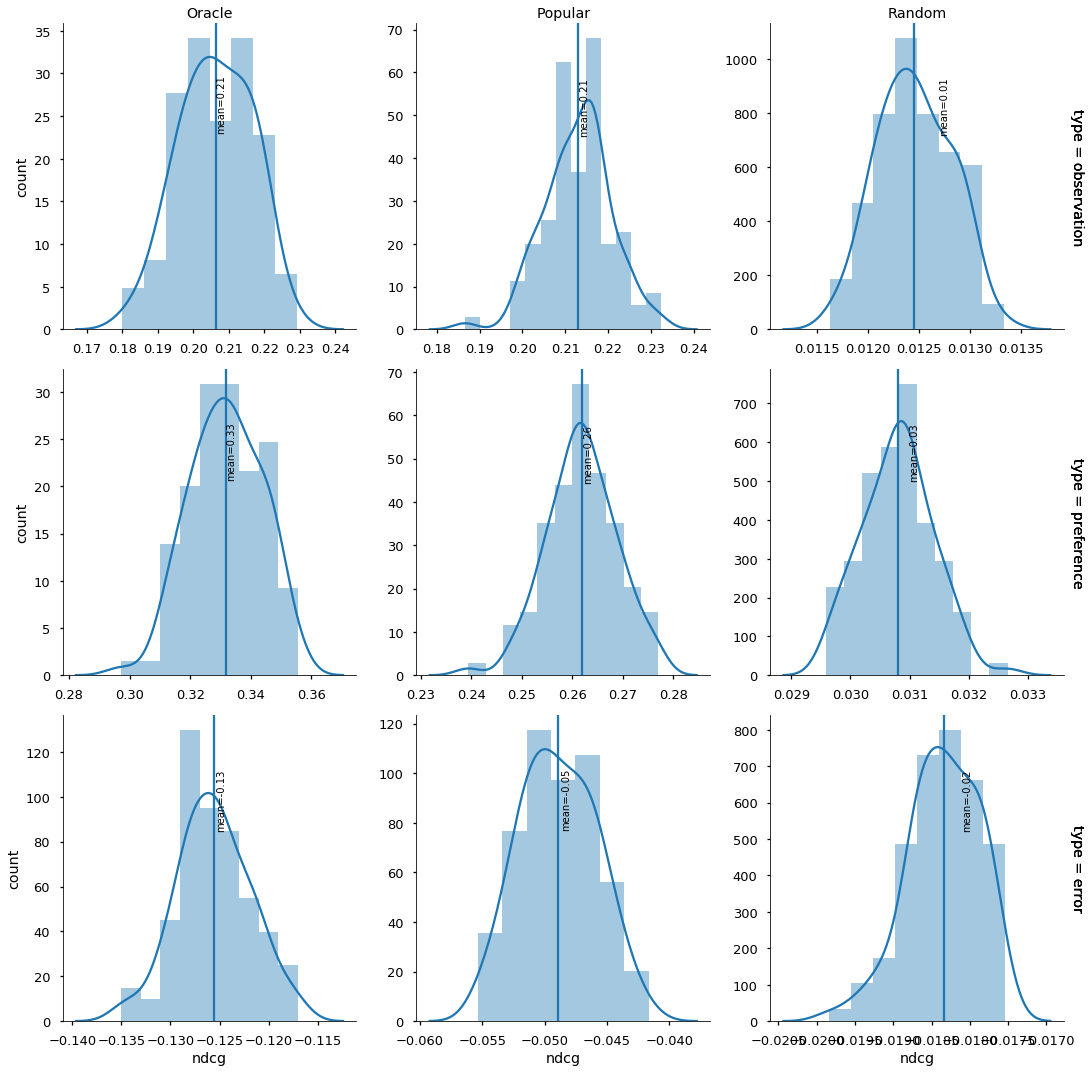

In [16]:
plot_metric(ibp_pop, 'ndcg')

- Similar to previous one.

### LDA - Uniform

**Precision**

/home/MucunTian/anaconda3/envs/eval-err/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/MucunTian/anaconda3/envs/eval-err/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


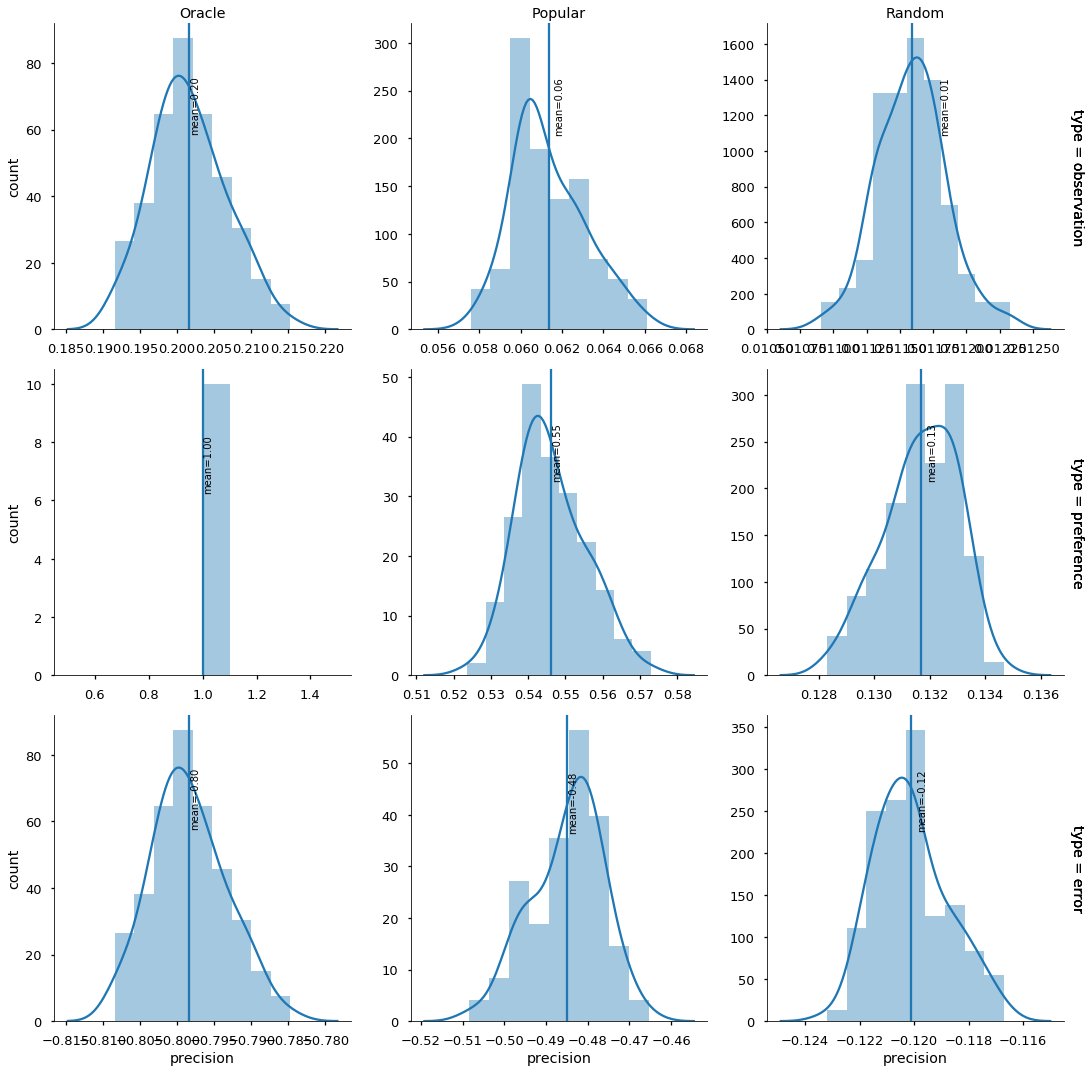

In [17]:
plot_metric(lda_unif, 'precision')

- Popular recommender can't even beat the random recommender!

**Recall**

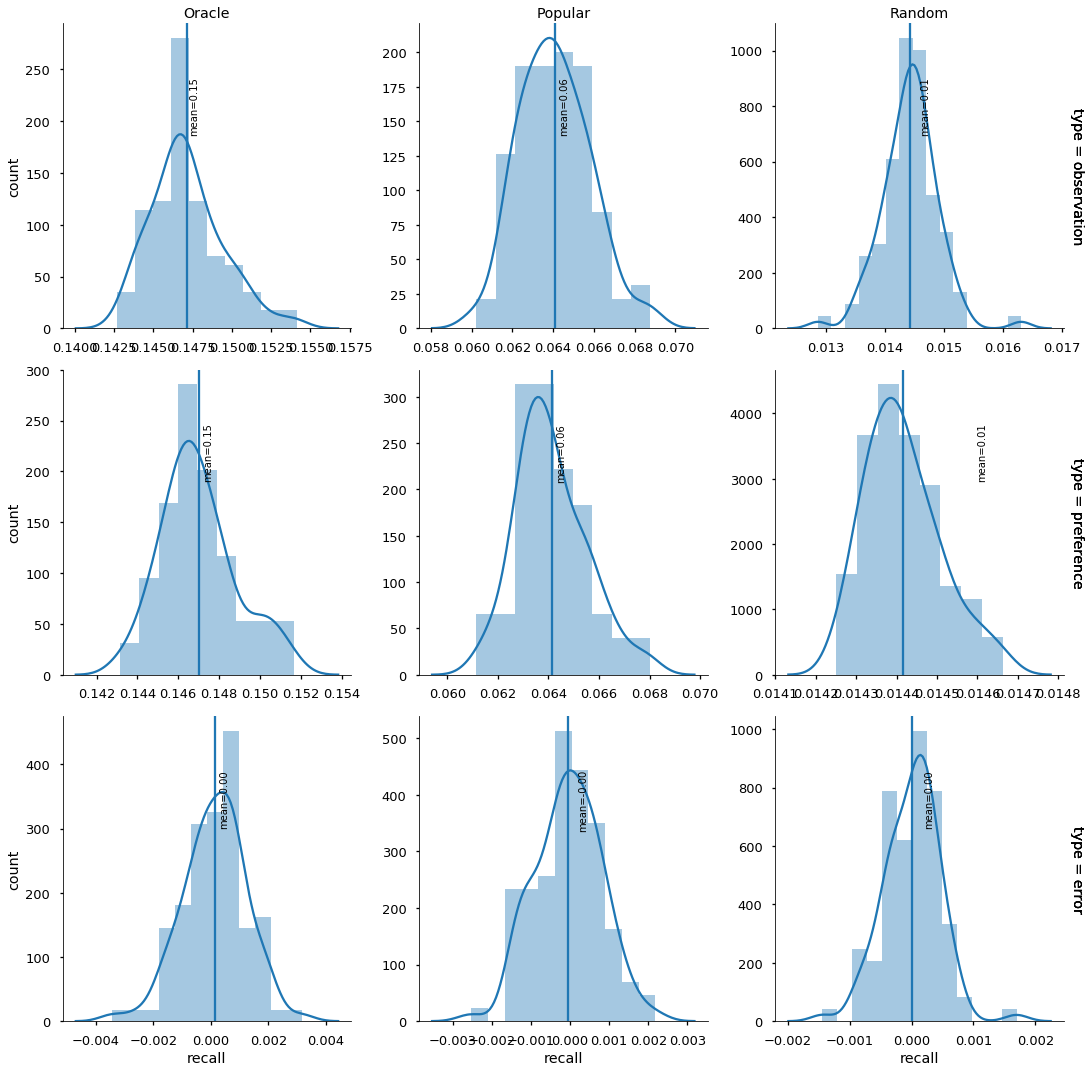

In [18]:
plot_metric(lda_unif, 'recall')

- Recall is unbiased.

**Reciprocal Rank**

/home/MucunTian/anaconda3/envs/eval-err/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/MucunTian/anaconda3/envs/eval-err/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


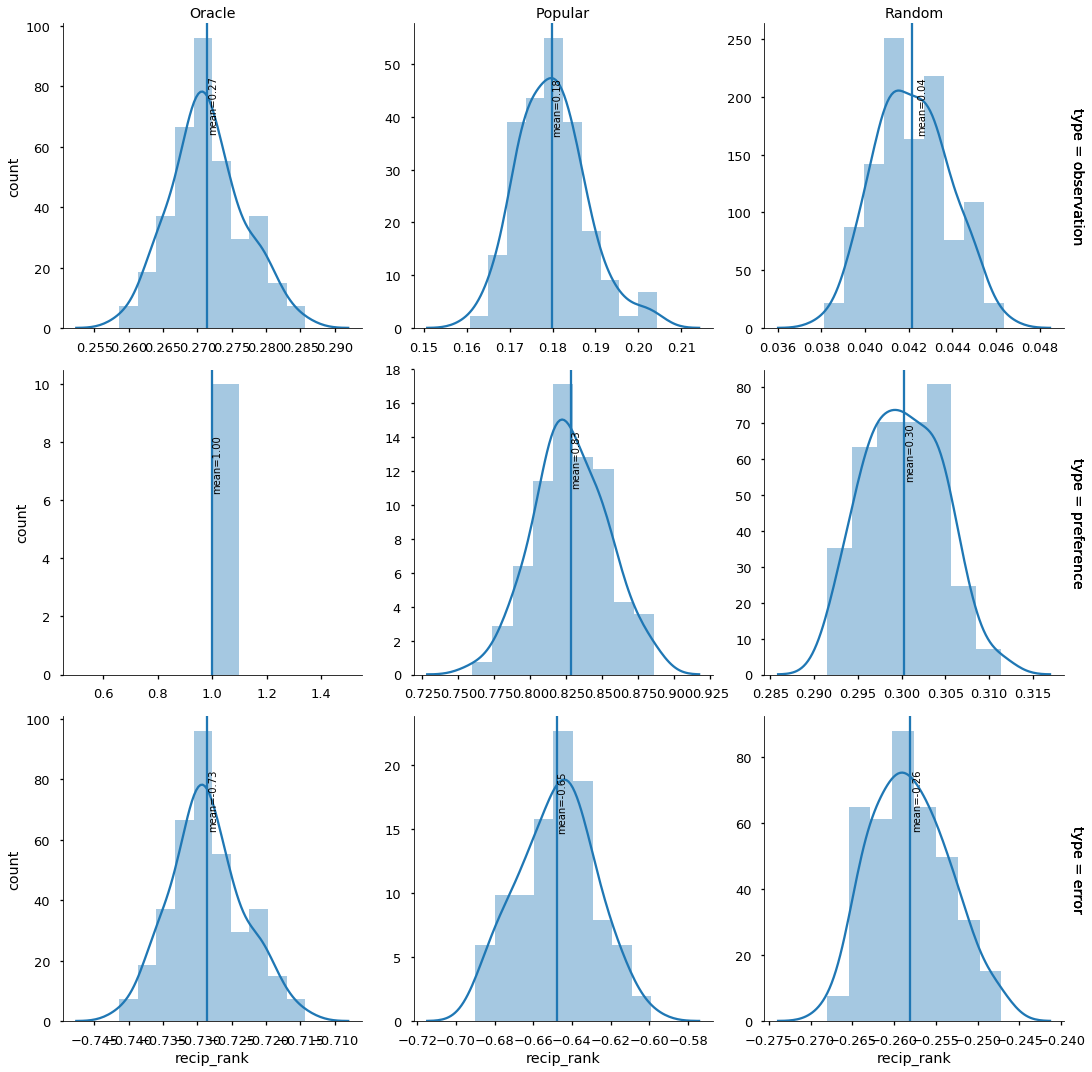

In [19]:
plot_metric(lda_unif, 'recip_rank')

**nDCG**

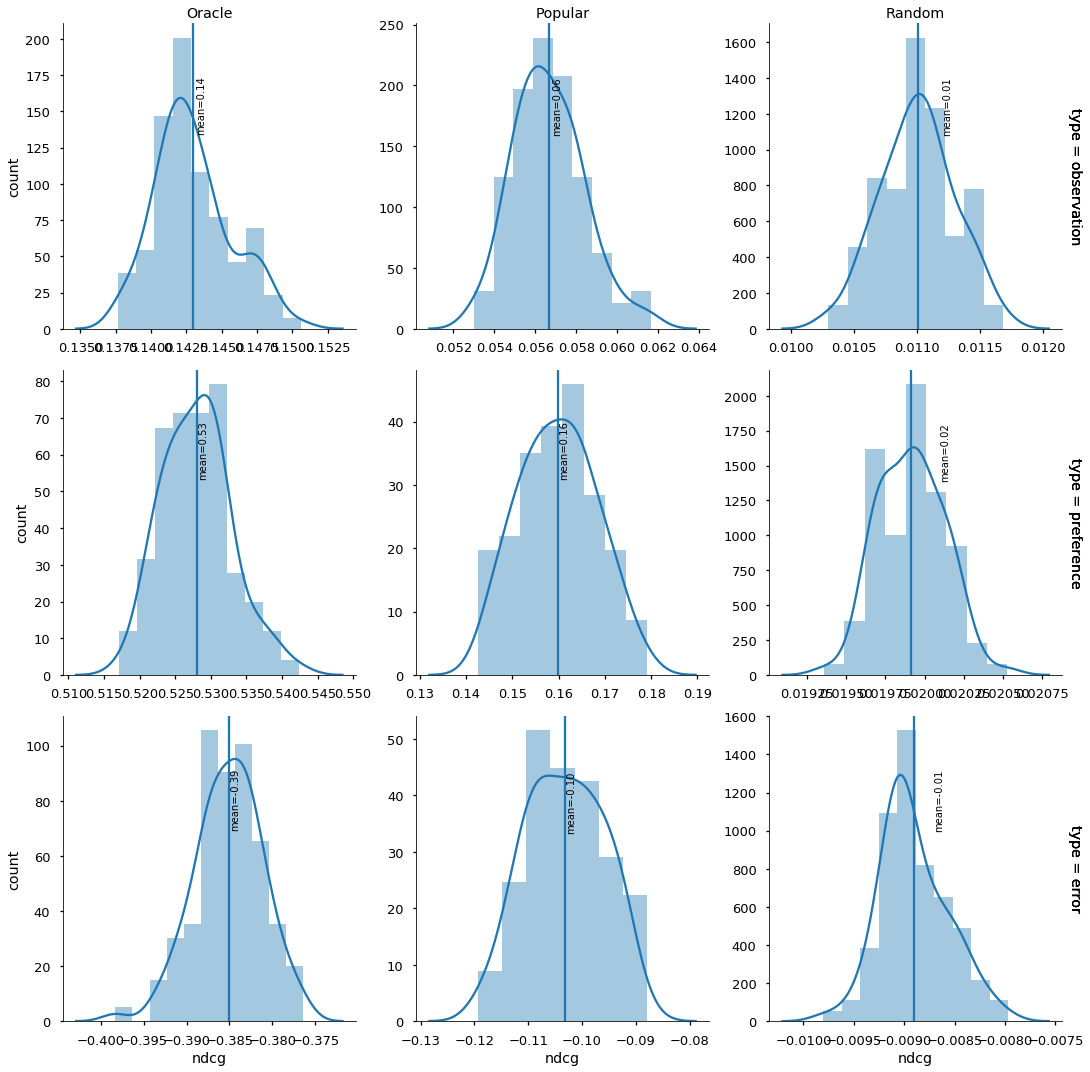

In [20]:
plot_metric(lda_unif, 'ndcg')

### LDA - Popularity

**Precision**

/home/MucunTian/anaconda3/envs/eval-err/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/MucunTian/anaconda3/envs/eval-err/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


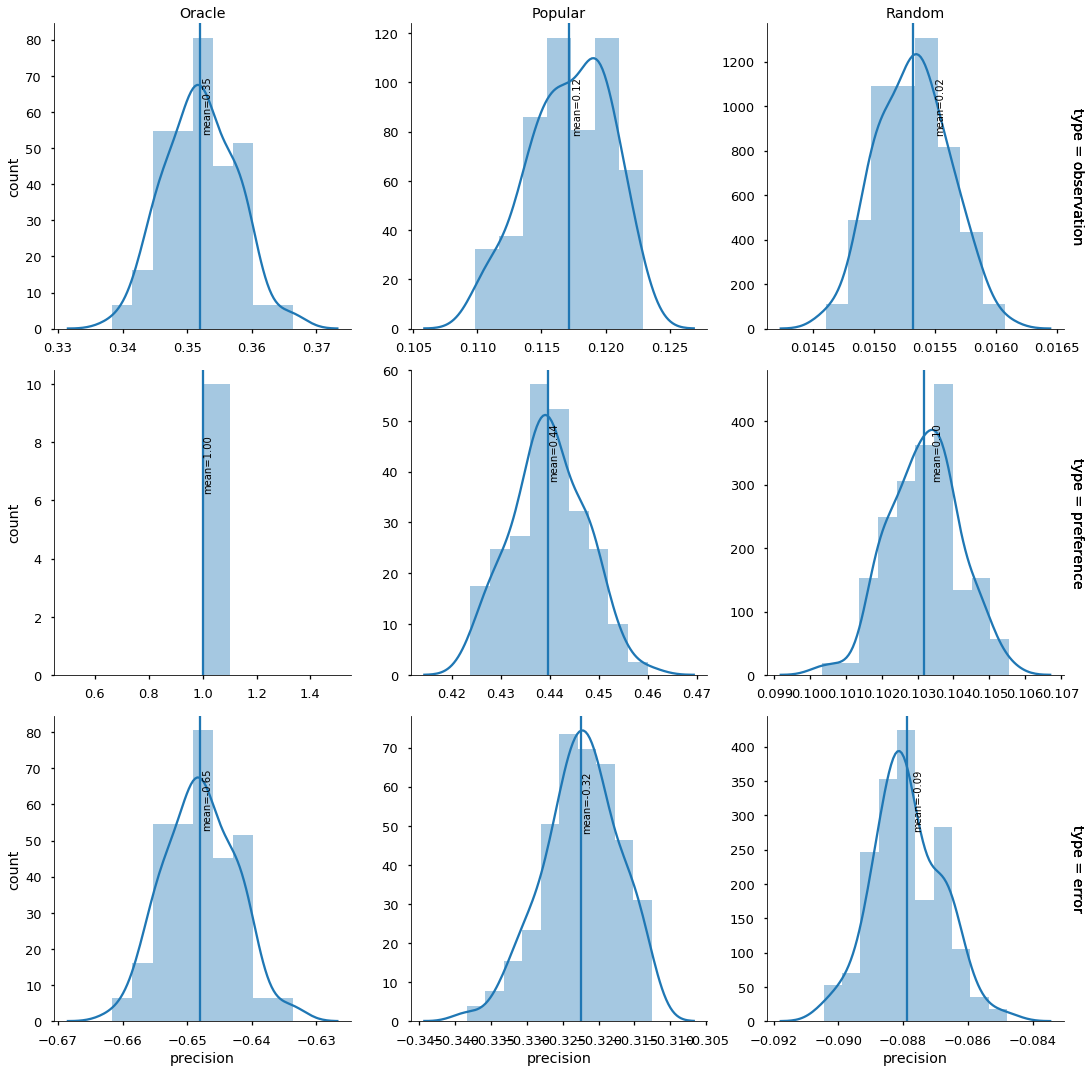

In [21]:
plot_metric(lda_pop, 'precision')

**Recall**

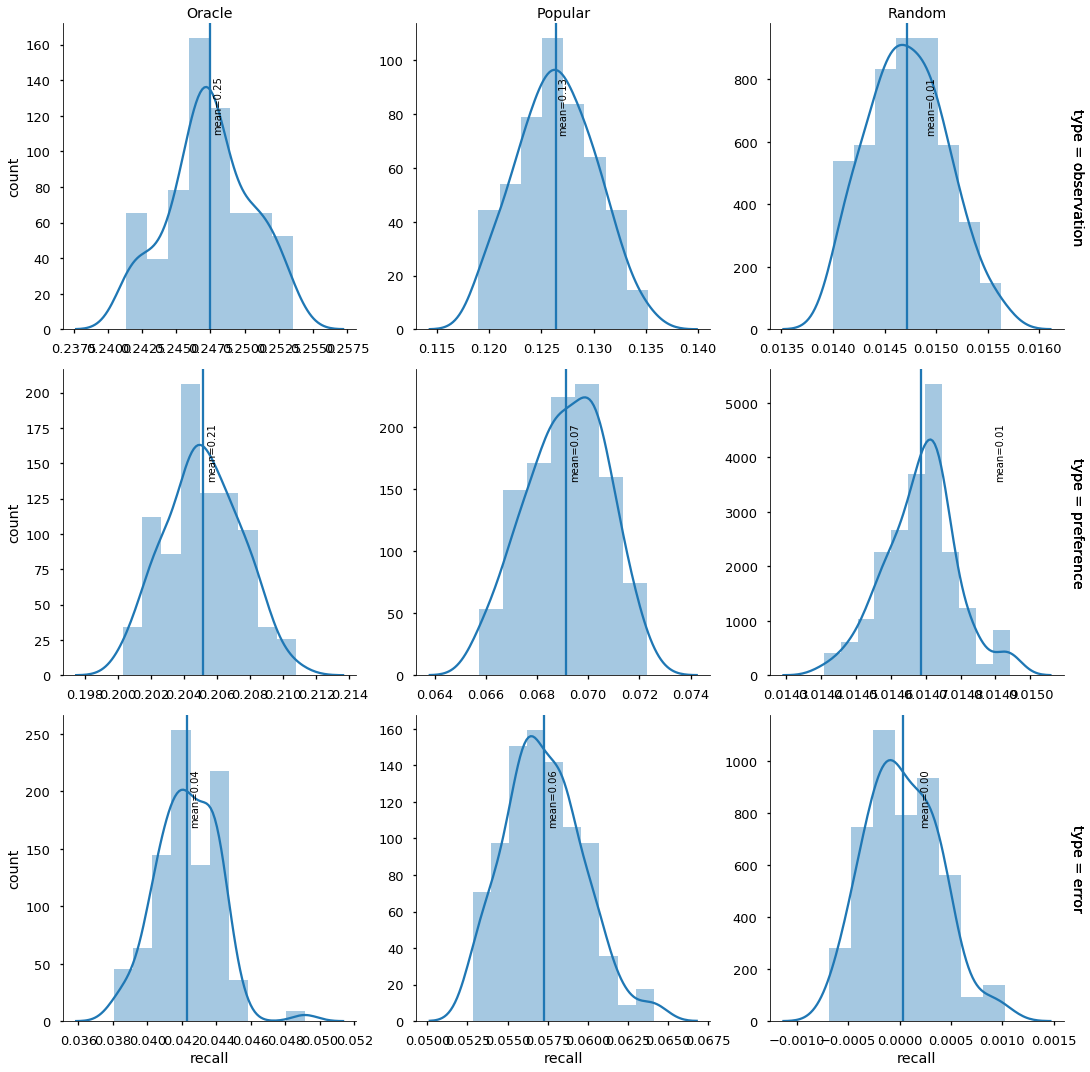

In [22]:
plot_metric(lda_pop, 'recall')

**Reciprocal Rank**

/home/MucunTian/anaconda3/envs/eval-err/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/MucunTian/anaconda3/envs/eval-err/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


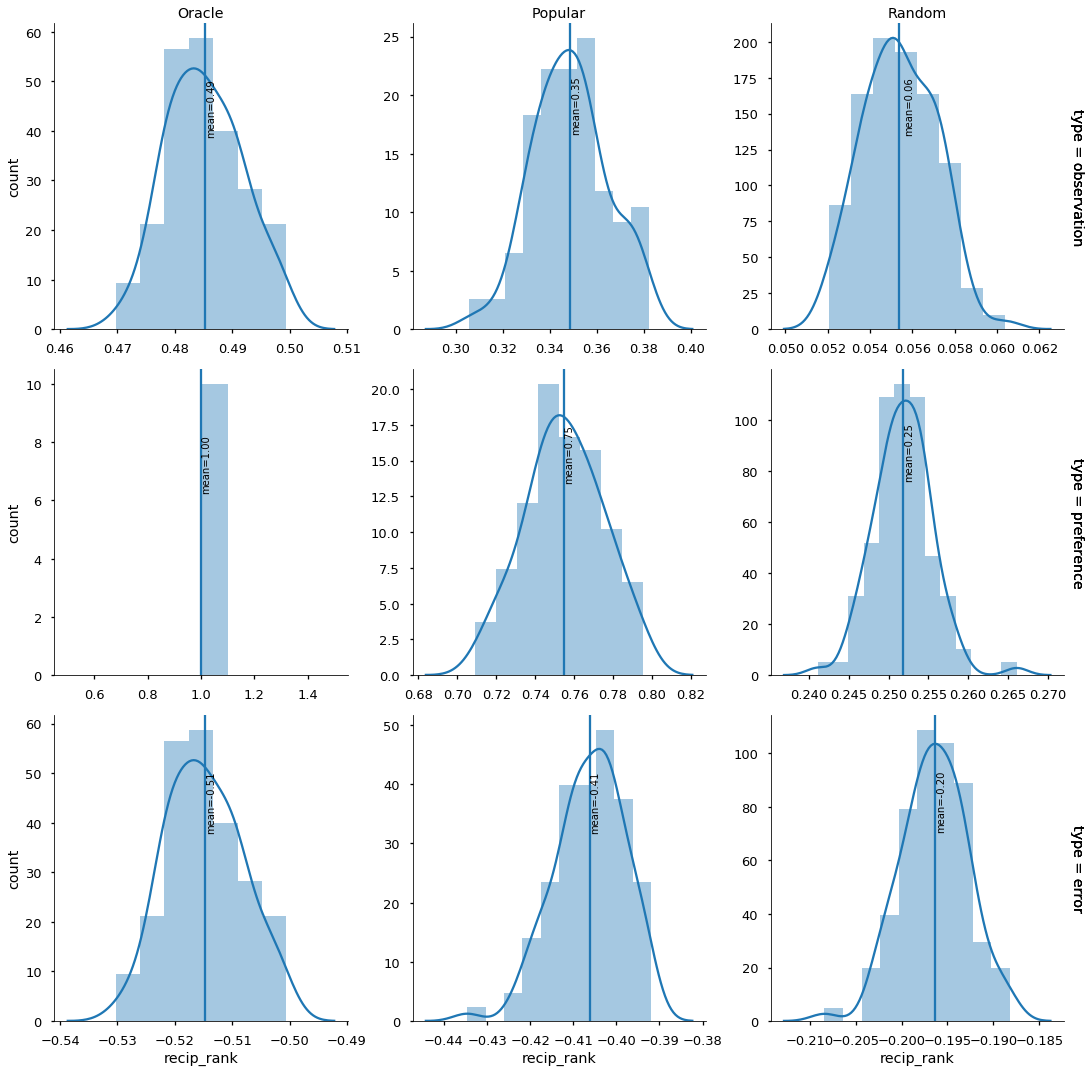

In [23]:
plot_metric(lda_pop, 'recip_rank')

**nDCG**

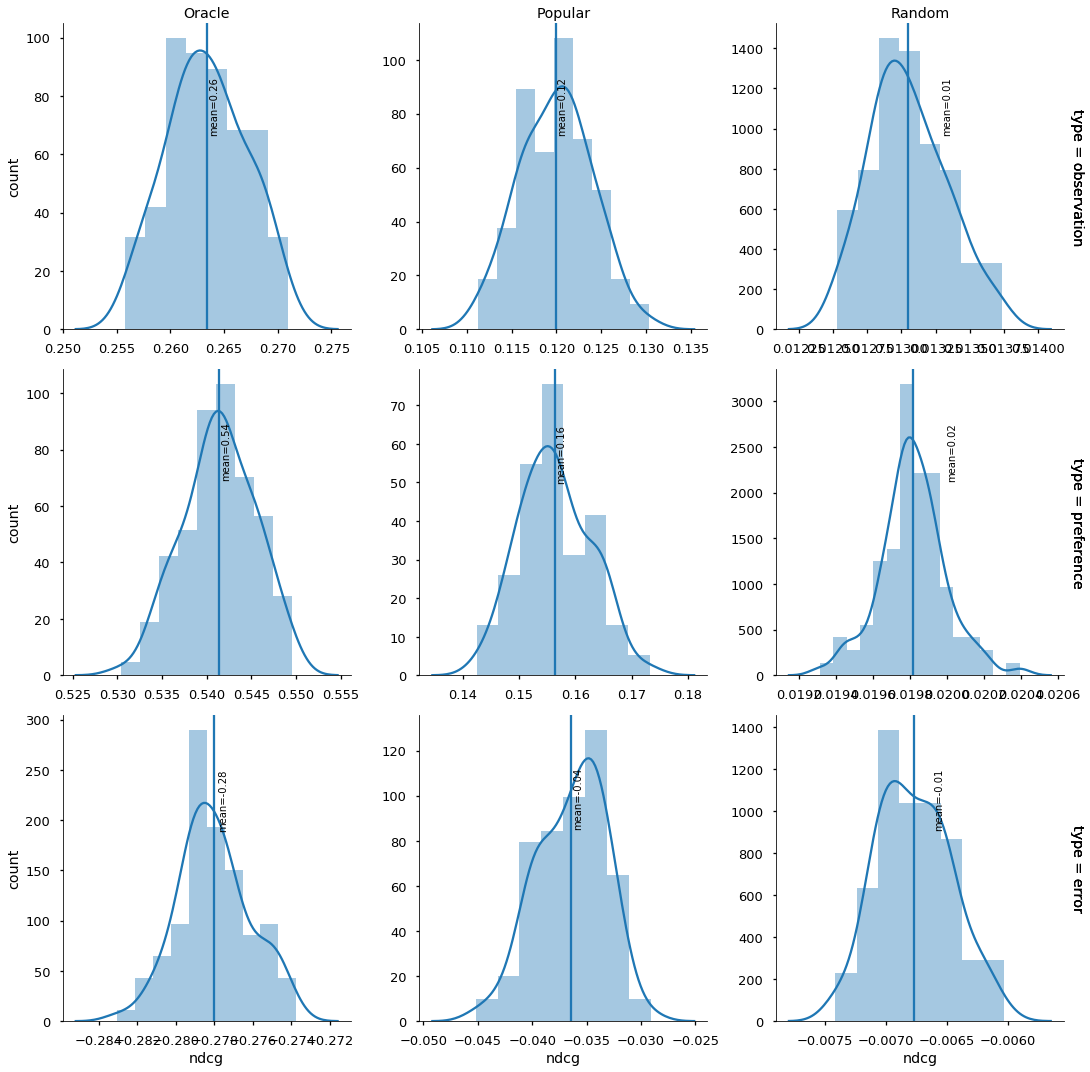

In [24]:
plot_metric(lda_pop, 'ndcg')

### Boxplot and Bar Chart

Combine data

In [25]:
def combine_data(datasets, generator_names, sampler_names, metric):
    data_list = map(lambda d, g, s: 
                    extract_result(d, metric).assign(generator=g, sampler=s), 
                    datasets, generator_names, sampler_names)
    return pd.concat(data_list, axis=0, ignore_index=True)

In [26]:
def plot_metric_stats(data, metric, metric_on, plot_func, style='seaborn-talk', **kwargs):
    df = data[['algorithm', 'generator', 'sampler', metric_on]]
    with plt.style.context(style):
        g = sns.FacetGrid(df, row='generator', col='sampler', 
                          sharey=False, sharex=True, 
                          height=5, margin_titles=True)
        g = (g.map(plot_func, 'algorithm', metric_on, **kwargs)
             .set_ylabels('-'.join([metric, metric_on])))
    plt.show()

In [27]:
def plot_metric_stats_dtype(data, metric, plot_func, style='seaborn-poster', **kwargs):
    df = data[['algorithm', 'generator', 'sampler', 'observation', 'preference']]
    df_tall = df.melt(id_vars=['algorithm', 'generator', 'sampler'], 
                      var_name='dtype', value_name='metric')
    with plt.style.context(style):
        g = sns.FacetGrid(df_tall, row='generator', col='sampler', 
                          sharey=False, sharex=True, 
                          height=5, margin_titles=True, 
                          legend_out=True)
        g = (g.map(plot_func, 'algorithm', 'metric', 'dtype', **kwargs)
             .add_legend()
             .set_ylabels(metric))
    plt.show()

In [28]:
sims_results = [ibp_unif, ibp_pop, lda_unif, lda_pop]
g_names = ['ibp', 'ibp', 'lda', 'lda']
s_names = ['uniform', 'popularity', 'uniform', 'popularity']

**Precision**

In [29]:
data2plot = combine_data(sims_results, g_names, s_names, 'precision')

In [30]:
data2plot.head()

,algorithm,observation,preference,error,generator,sampler
0,Oracle,0.297195,1.000000,-0.702805,ibp,uniform
1,Popular,0.212692,0.889990,-0.677298,ibp,uniform
2,Random,0.014411,0.109911,-0.095500,ibp,uniform
3,Oracle,0.308593,1.000000,-0.691407,ibp,uniform
4,Popular,0.217457,0.882563,-0.665106,ibp,uniform


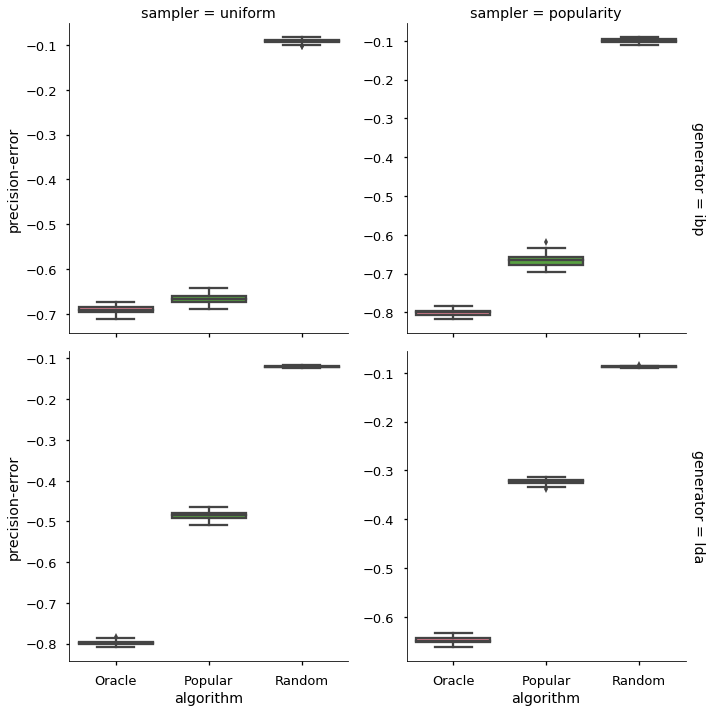

In [31]:
plot_metric_stats(data2plot, 'precision', 'error', sns.boxplot, 
                  order=['Oracle', 'Popular', 'Random'], 
                  palette='husl')

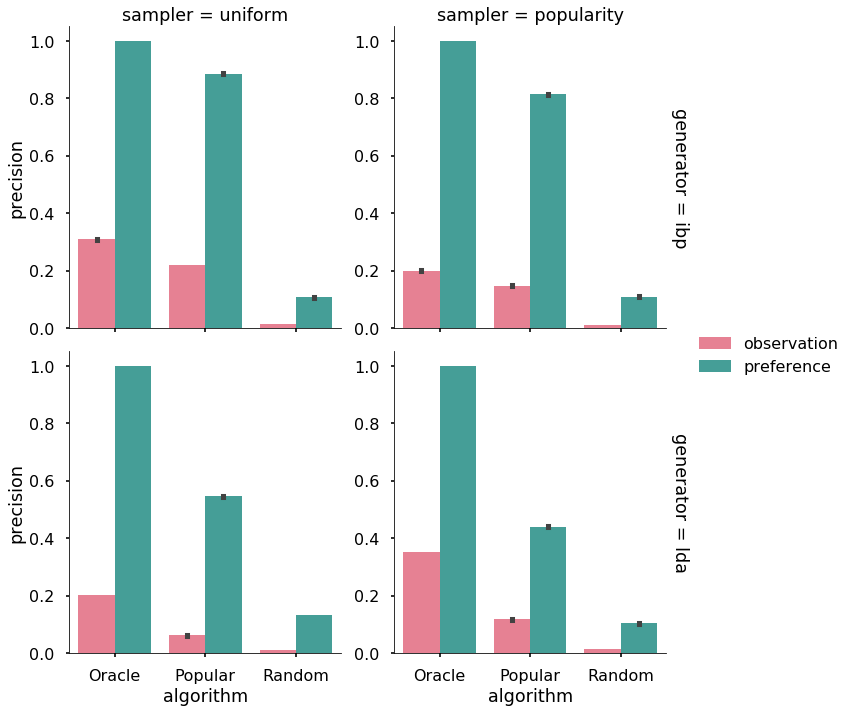

In [32]:
plot_metric_stats_dtype(data2plot, 'precision', sns.barplot,
                        order=['Oracle', 'Popular', 'Random'], 
                        hue_order=['observation', 'preference'],
                        palette='husl')

**Recall**

In [33]:
data2plot = combine_data(sims_results, g_names, s_names, 'recall')

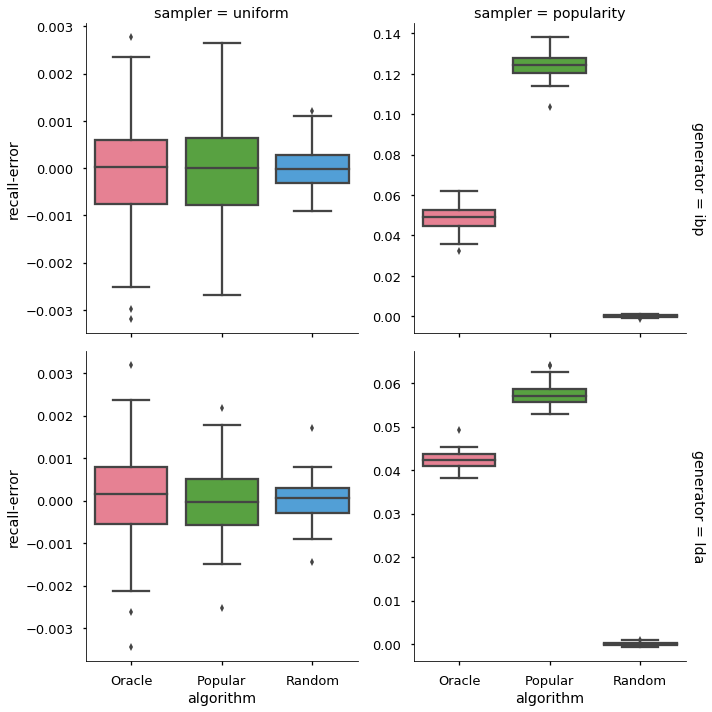

In [34]:
plot_metric_stats(data2plot, 'recall', 'error', 
                  sns.boxplot, order=['Oracle', 'Popular', 'Random'],
                  palette='husl')

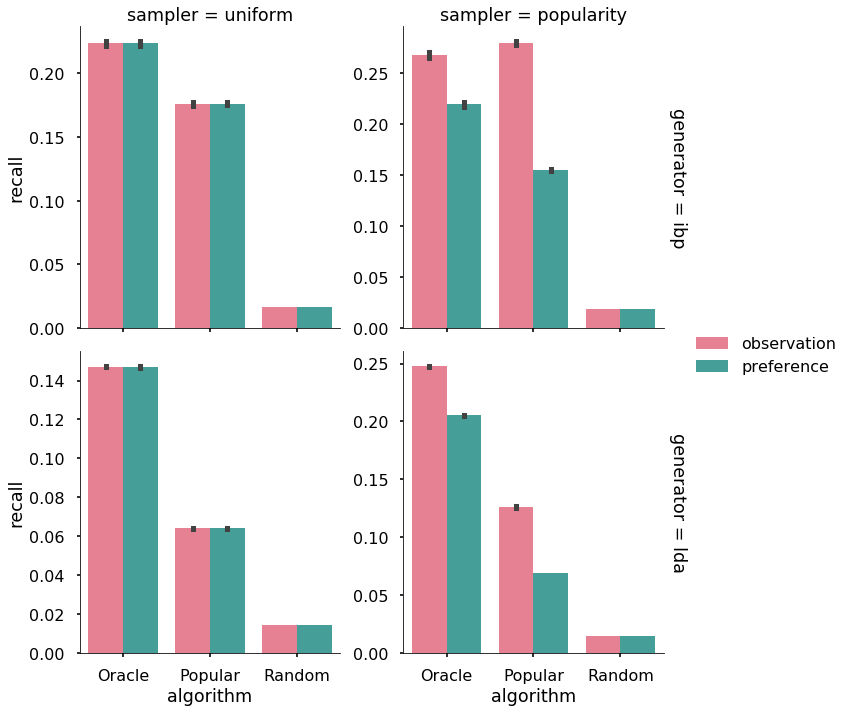

In [35]:
plot_metric_stats_dtype(data2plot, 'recall', sns.barplot, 
                        order=['Oracle', 'Popular', 'Random'], 
                        hue_order=['observation', 'preference'],
                        palette='husl')

**MRR**

In [36]:
data2plot = combine_data(sims_results, g_names, s_names, 'recip_rank')

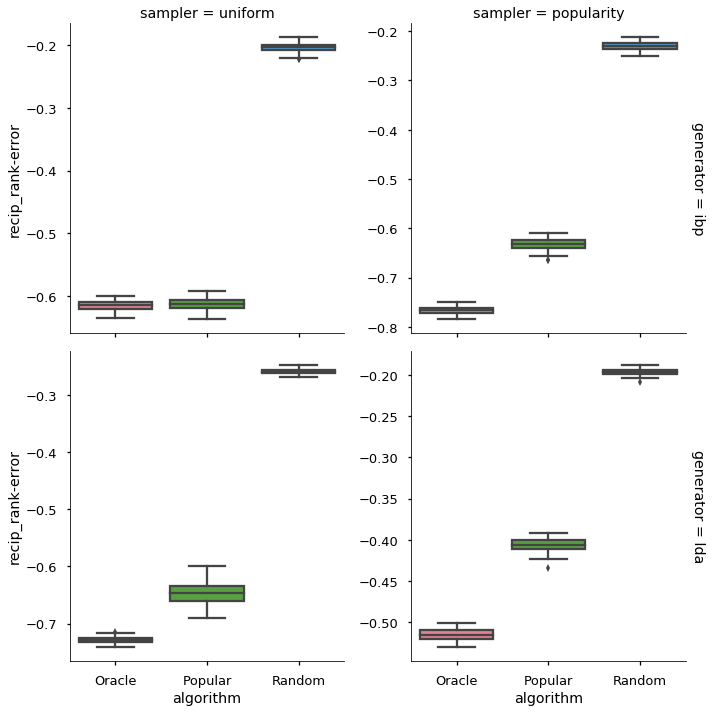

In [37]:
plot_metric_stats(data2plot, 'recip_rank', 'error', 
                  sns.boxplot, order=['Oracle', 'Popular', 'Random'],
                  palette='husl')

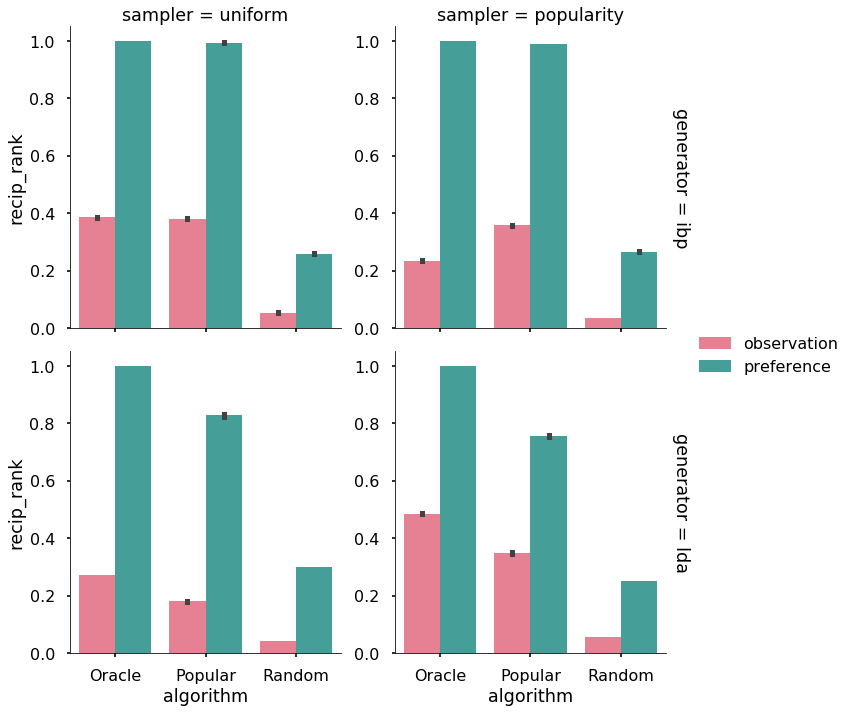

In [38]:
plot_metric_stats_dtype(data2plot, 'recip_rank', sns.barplot, 
                        order=['Oracle', 'Popular', 'Random'], 
                        hue_order=['observation', 'preference'],
                        palette='husl')

**ndcg**

In [39]:
data2plot = combine_data(sims_results, g_names, s_names, 'ndcg')

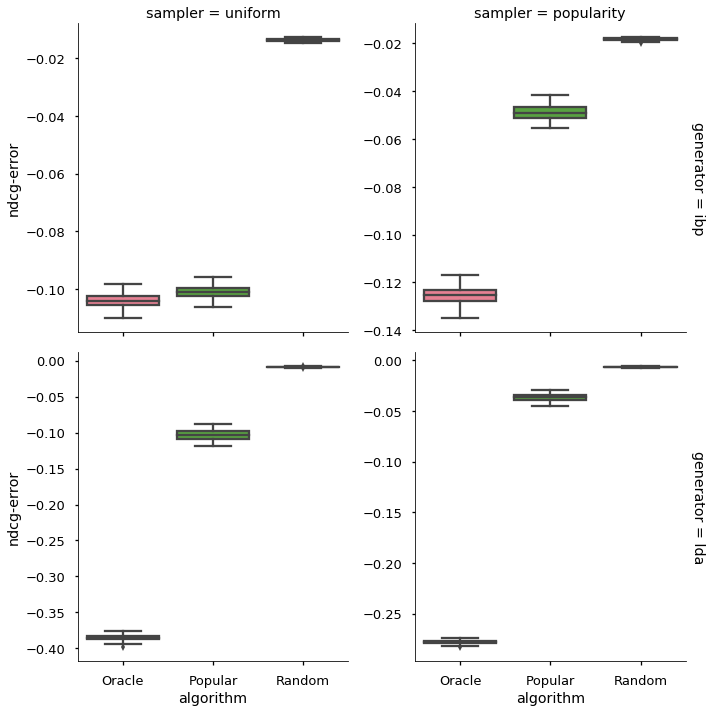

In [40]:
plot_metric_stats(data2plot, 'ndcg', 'error', 
                  sns.boxplot, order=['Oracle', 'Popular', 'Random'],
                  palette='husl')

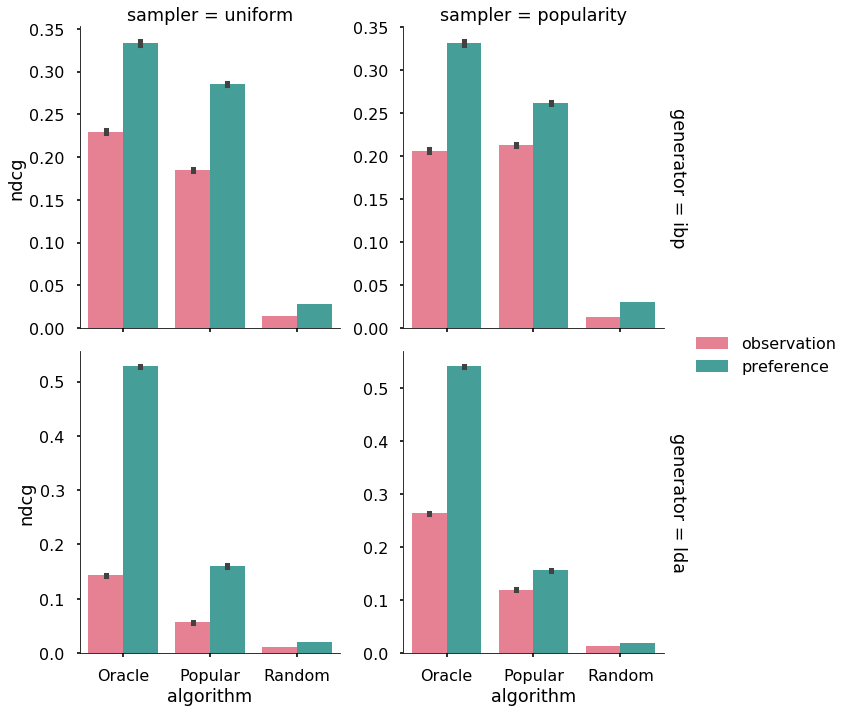

In [41]:
plot_metric_stats_dtype(data2plot, 'ndcg', sns.barplot, 
                        order=['Oracle', 'Popular', 'Random'], 
                        hue_order=['observation', 'preference'],
                        palette='husl')